# Ett Machine Learning exempel

## Kommande studiecirkel
[Anmälningsformuläret](https://docs.google.com/forms/d/e/1FAIpQLSdMznAsCBbhE2s-5VWFgm9pecUM_jUB4VDltKixMfzIx5TfcA/viewform).

## Fastbook, fast.ai, PyTorch och TensorFlow

In [5]:
!pip install -Uqq fastbook
from fastbook import *
setup_book()

## En första modell

In [ ]:
from fastai.vision.all import *

path = untar_data(URLs.PETS)/'images'

def is_cat(x):
  return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

# Bedöma modells effektivitet och testa det manuellt


In [ ]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

## Vad är Machine Learning?

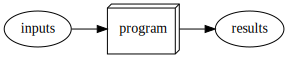

In [ ]:
gv('''program[shape=box3d width=1 height=0.7] inputs->program->results''')

> Att programmera en dator för en sådan uppgift är en svår (om inte omöjlig) uppgift. Inte nödvändigtvis för att en inneboende komplexitet i problemet, utan för nödvändigheten att i detalj skriva ner varje steg. Datorer, som de flesta programmerare ser det, är enorma idioter, inte enorma hjärnor.


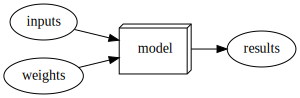

In [ ]:
gv('''model[shape=box3d width=1 height=0.7] inputs->model->results; weights->model''')

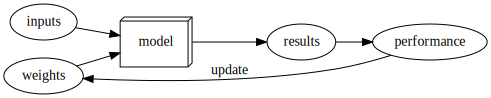

In [ ]:
gv('''ordering=in model[shape=box3d width=1 height=0.7] inputs->model->results; weights->model; results->performance performance->weights[constraint=false label=update]''')

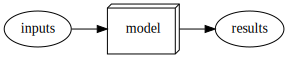

In [ ]:
gv('''model[shape=box3d width=1 height=0.7] inputs->model->results''')

> Machine Learning: The training of programs developed by allowing a computer to learn from its experience, rather than through manually coding the individual steps.

## Neurala nätverk

![Neuroner](https://github.com/fastai/fastbook/raw/fb570779062177662fbfde0f5dbb1e9f08dabbee/images/chapter7_neuron.png)

## Begränsningar hos Machine learning

## Etiska problem